In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv('dataset/IMDB Dataset.csv')

# Lowercasing

In [2]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
## One row's review text
df['review'][3].lower()

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

In [4]:
## All rows' review text
df['review'].str.lower()

## reassign to df
df['review'] = df['review'].str.lower()

In [5]:
df['review'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production. <br /><br />the...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object

# Remove HTML tags

In [6]:
text = "<h1>Welcome to the Dummy World</h1> <p>This is a paragraph of dummy text. You can add <a href="">dummy links</a> to nowhere, and use <strong>bold text</strong> for emphasis.</p> <ul> <li>This is a dummy list item.</li> <li>And here's another one.</li> </ul>"

In [7]:
import re

def remove_html_tags(text):
    """Remove html tags from a string"""
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [8]:
remove_html_tags(text)

"Welcome to the Dummy World This is a paragraph of dummy text. You can add dummy links to nowhere, and use bold text for emphasis.  This is a dummy list item. And here's another one. "

In [9]:
df['review'] = df['review'].apply(remove_html_tags) 

df['review'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production. the filming tec...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object

# Removing URLs

In [10]:
text1 = "my github link is https://github.com/Garima-tata/NLP"
text2 = "my chatgpt link is https://chat.openai.com/c/d889d3e0-8328-4e6d-b039-51e7914b4de9"
text3= "my kaggle link is https://www.kaggle.com/code/campusx/text-preprocessing/script"

In [11]:
text1

'my github link is https://github.com/Garima-tata/NLP'

In [12]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [13]:
remove_urls(text1)

'my github link is '

In [14]:
remove_urls(text2)

'my chatgpt link is '

In [15]:
remove_urls(text3)

'my kaggle link is '

# Remove Puntuation

In [16]:
import string, time 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
exclude = string.punctuation

In [18]:
def remove_punctuation(text):
    for char in exclude:
        text = text.replace(char, '')
    return text

In [19]:
text = 'String. With. Punctuation?'

In [20]:
start = time.time()
print(remove_punctuation(text))
time1 = time.time() - start
print(time1)
time1 = time1*24783
print(time1)

String With Punctuation
0.0
0.0


In [21]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [22]:
df = pd.read_csv('dataset/labeled_data.csv')
print(df.shape)
df.head()

(24783, 7)


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [23]:
start = time.time()
df['tweet'].apply(remove_punctuation)
time2 = time.time() - start
print(time2)

0.12200021743774414


In [24]:
time1/time2

0.0

#### Hence we should use second method because first manuall writing method is 217 times slower than second direct method

# Chatbot treatment

In [25]:
"""
rofl, lmao, imho , fyi, asap, gn

Bring out the meaning of the following acronyms.

To do this, we will use a Github repository and we will convert all such words as key of a dictionary and there full form as the value. so, we are creating dict with <key, value> == <acronym, full form> .
"""

'\nrofl, lmao, imho , fyi, asap, gn\n\nBring out the meaning of the following acronyms.\n\nTo do this, we will use a Github repository and we will convert all such words as key of a dictionary and there full form as the value. so, we are creating dict with <key, value> == <acronym, full form> .\n'

In [26]:
# Initialize an empty dictionary to store the acronyms and meanings
acronym_dict = {}

# Open the text file for reading
with open("slang.txt", "r") as file:
    # Iterate through each line in the file
    for line in file:
        # Split the line into acronym and meaning using '=' as a delimiter
        parts = line.strip().split('=')
        if len(parts) == 2:
            acronym, meaning = parts[0], parts[1]
            acronym_dict[acronym] = meaning

# Print the dictionary
print(acronym_dict)


{'AFAIK': 'As Far As I Know', 'AFK': 'Away From Keyboard', 'ASAP': 'As Soon As Possible', 'ATK': 'At The Keyboard', 'ATM': 'At The Moment', 'A3': 'Anytime, Anywhere, Anyplace', 'BAK': 'Back At Keyboard', 'BBL': 'Be Back Later', 'BBS': 'Be Back Soon', 'BFN': 'Bye For Now', 'B4N': 'Bye For Now', 'BRB': 'Be Right Back', 'BRT': 'Be Right There', 'BTW': 'By The Way', 'B4': 'Before', 'CU': 'See You', 'CUL8R': 'See You Later', 'CYA': 'See You', 'FAQ': 'Frequently Asked Questions', 'FC': 'Fingers Crossed', 'FWIW': "For What It's Worth", 'FYI': 'For Your Information', 'GAL': 'Get A Life', 'GG': 'Good Game', 'GN': 'Good Night', 'GMTA': 'Great Minds Think Alike', 'GR8': 'Great!', 'G9': 'Genius', 'IC': 'I See', 'ICQ': 'I Seek you (also a chat program)', 'ILU': 'ILU: I Love You', 'IMHO': 'In My Honest/Humble Opinion', 'IMO': 'In My Opinion', 'IOW': 'In Other Words', 'IRL': 'In Real Life', 'KISS': 'Keep It Simple, Stupid', 'LDR': 'Long Distance Relationship', 'LMAO': 'Laugh My A.. Off', 'LOL': 'Laug

In [27]:
def chat_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in acronym_dict.keys():
            new_text.append(acronym_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [28]:
chat_conversion("rofl that was funny")

'Rolling On The Floor Laughing that was funny'

# Spelling Correction

In [29]:
from textblob import TextBlob

In [30]:
# Sample  text for spelling correction  
incorrect_text = 'Speling correctin is a important aspekt in many NLP applicatins.'

TextBlb = TextBlob(incorrect_text)

TextBlb.correct()

TextBlob("Feeling correction is a important aspect in many NLP applications.")

In [31]:
TextBlb.correct().string

'Feeling correction is a important aspect in many NLP applications.'

# Removing Stop Words

a, the, of, are when you do not need meaning, and don't want to appply POS tagging then you can remove stop words

In [32]:
from nltk.corpus import stopwords

In [33]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append("")
        else:
            new_text.append(word)
    
    x = new_text[:]
    # print(x) ## x is equal to new_text but we have created it because we want to clear the new_text list
    new_text.clear()
    return " ".join(x)
    

In [35]:
remove_stopwords("This is a sample English sentence that has stopwords")

'This   sample English sentence   stopwords'

In [36]:
df = pd.read_csv('dataset/IMDB Dataset.csv')
df = df[:10]
df['review'].apply(remove_stopwords)

0    One    reviewers  mentioned   watching  1 Oz e...
1    A wonderful little production. <br /><br />The...
2    I thought    wonderful way  spend time    hot ...
3    Basically there's  family   little boy (Jake) ...
4    Petter Mattei's "Love   Time  Money"   visuall...
5    Probably  all-time favorite movie,  story  sel...
6    I sure would like  see  resurrection    dated ...
7    This show   amazing, fresh & innovative idea  ...
8    Encouraged   positive comments   film   I  loo...
9    If  like original gut wrenching laughter   lik...
Name: review, dtype: object

# Handling Emojis

In [37]:
import re 
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" #emoticons
                               u"\U0001F300-\U0001F5FF" #symbols & pictographs
                               u"\U0001F680-\U0001F6FF" #transport & map symbols
                               u"\U0001F1E0-\U0001F1FF" #flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [38]:
remove_emojis("Have fun with NLP! 😃😃")

'Have fun with NLP! '

In [39]:
remove_emojis("LMAO 😃😃")

'LMAO '

In [40]:
# !pip install emoji

In [41]:
import emoji
print(emoji.emojize('Python is :thumbs_up:'))

Python is 👍


### faster way to demojize

In [42]:
print(emoji.demojize('Python is 👍'))

Python is :thumbs_up:


# Tokenization

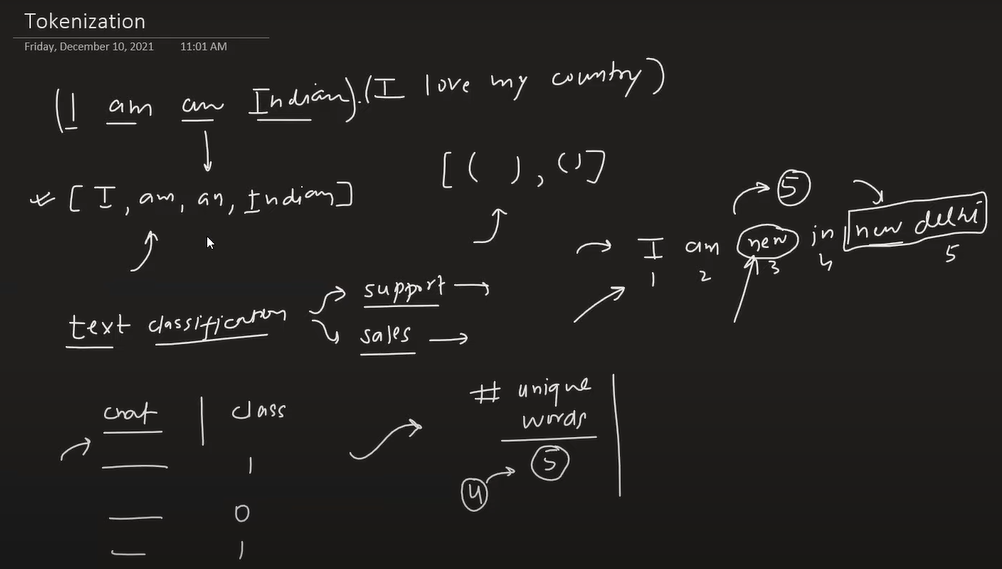

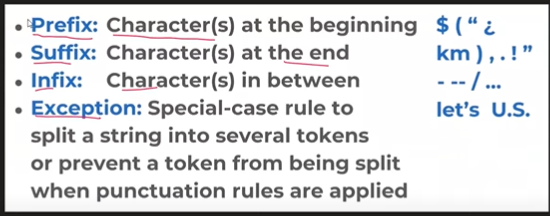

## Use split function

In [43]:
# word tokenization
sent1 = "This is a foo bar sentence ."
sent1.split()

['This', 'is', 'a', 'foo', 'bar', 'sentence', '.']

In [44]:
# sentence tokenization
sent2 = "This is a foo bar sentence. I am a new sentence. Let's see how it works."
sent2.split('.')

['This is a foo bar sentence',
 ' I am a new sentence',
 " Let's see how it works",
 '']

In [45]:
# Problems with split()
sent3 = 'I am going to Delhi!'
sent3.split()

['I', 'am', 'going', 'to', 'Delhi!']

In [46]:
sent4 = "Where do think I should go? I have 3 days"
print(sent4.split('.'))
print(sent4.split('?'))

['Where do think I should go? I have 3 days']
['Where do think I should go', ' I have 3 days']


## Regular Expression

In [47]:
import re
sent = 'I am going to Delhi!'
tokens = re.findall("[\w']+", sent) ## \w is for alphanumeric characters and \w' is for alphanumeric characters with "!"
tokens

['I', 'am', 'going', 'to', 'Delhi']

In [48]:
sent = """I am going to Delhi! I have 3 days to explore the city. I am super excited. where do you think I should go?"""
tokens = re.compile('[.!?] ').split(sent) ## \w is for alphanumeric characters and \w' is for alphanumeric characters with "!"
tokens

['I am going to Delhi',
 'I have 3 days to explore the city',
 'I am super excited',
 'where do you think I should go?']

## NLTK

In [61]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [62]:
sent = """I am going to Delhi! I have 3 days to explore the city. I am super excited. where do you think I should go?"""

word_tokenize(sent)

['I',
 'am',
 'going',
 'to',
 'Delhi',
 '!',
 'I',
 'have',
 '3',
 'days',
 'to',
 'explore',
 'the',
 'city',
 '.',
 'I',
 'am',
 'super',
 'excited',
 '.',
 'where',
 'do',
 'you',
 'think',
 'I',
 'should',
 'go',
 '?']

In [63]:
sent_tokenize(sent)

['I am going to Delhi!',
 'I have 3 days to explore the city.',
 'I am super excited.',
 'where do you think I should go?']

In [64]:
## Here it fails to tokenize the sentence properly like garima@iitbhilai, 5km, D.S.A.I is not tokenized properly
sent = "garimat@iitbhilai.ac.in 5km where are you going, I have a B.Tech Degree in Ph.D from IIT Bhilai."

In [65]:
word_tokenize(sent)

['garimat',
 '@',
 'iitbhilai.ac.in',
 '5km',
 'where',
 'are',
 'you',
 'going',
 ',',
 'I',
 'have',
 'a',
 'B.Tech',
 'Degree',
 'in',
 'Ph.D',
 'from',
 'IIT',
 'Bhilai',
 '.']

## Spacy


convert sentences in documents

In [54]:
# !pip install spacy

In [55]:
# !python -m spacy download en_core_web_sm

In [56]:
import spacy
nlp = spacy.load('en_core_web_sm')
nlp

In [66]:
## convert sentence in to doc object
doc1 = nlp("garimat@iitbhilai.ac.in 5km where are you going")
doc2 = nlp("I am going to Delhi! I have 3 days to explore the city. I am super excited. where do you think I should go?")
doc3 = nlp("I have a B.Tech Degree in Ph.D from IIT Bhilai.")
doc3

I have a B.Tech Degree in Ph.D from IIT Bhilai.

In [70]:
for token in doc1:
    print(token.text, end=' ')
print('\n')
for token in doc2:
    print(token.text, end=' ')
print('\n')
for token in doc3:
    print(token.text, end=' | ')
print('\n')


## correct way to tokenize emails, 5km in 5 km, delhi! in delhi !, etc but Ph.D pe word_tokenize() is better

garimat@iitbhilai.ac.in 5 km where are you going 

I am going to Delhi ! I have 3 days to explore the city . I am super excited . where do you think I should go ? 

I | have | a | B.Tech | Degree | in | Ph | . | D | from | IIT | Bhilai | . | 



# Stemming


### Inflection: it is modification of a word to express different grammatical categories such as tense, case, voice, person, number, gender and mood.

example: walk == walker, walking, walked, walks ko root word walk mai convert karna. 

Mostly used in Information Retrieval(IR) Systems.

## NLTK for stemming

different algos availble we will use porter stemmer

In [71]:
from nltk.stem.porter import PorterStemmer

In [76]:
ps = PorterStemmer()
def stem_words(words):
    return ' '.join([ps.stem(w) for w in words.split()])

In [78]:
sample = "walk walks walked walking walker possibly movie"
stem_words(sample)

'walk walk walk walk walker possibl movi'

you can see in above output, stemming is the process of reducing inflection in words to their root forms such as mapping to a group of words to the same stem even if the stem itself is not a valid word in the language.

# Lemmatization

Same as stemming but output root word always language ki dictionary mai exits karega. toh its a slower method than stemming because it needs to find the correct root word from dictionary.

In lemmatization root word is also known as Lemma. A Lemma is the canonical form, dictionary form or citation form of a set of words

In [84]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."
puntuation = "?:!.,;"
sentence_words = nltk.word_tokenize(sentence)  ## we can remhove puntuation from sentence_words list
for word in sentence_words:
    if word in puntuation:
        sentence_words.remove(word)


print("{0:20}{1:20}".format("Word","Lemma")) ## 0:20 means 20 spaces
for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word)))
    
print("------------------------------")
for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word, pos="v")))


Word                Lemma               
He                  He                  
was                 wa                  
running             running             
and                 and                 
eating              eating              
at                  at                  
same                same                
time                time                
He                  He                  
has                 ha                  
bad                 bad                 
habit               habit               
of                  of                  
swimming            swimming            
after               after               
playing             playing             
long                long                
hours               hour                
in                  in                  
the                 the                 
Sun                 Sun                 
------------------------------
He                  He                  
was                 be    